# Intuiciones sobre convoluciones

🎯 <b><u>Objetivos</u></b>
- **Escribamos operaciones convolucionales**
- **Visualicemos**
    - kernels de convolucion
    - los efectos de los kernels de convolucion aplicados a imagenes

## (0) El dataset

❓ Primero usemos la siguiente funcion `load_data` para cargar los datos ❓

* No modifique nada de la funcion!
* no modifique los shape o los outputs! Esto tendra un impacto en las siguientes preguntas.

In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data("../Datasets/data")

❓ **preguntas sobre los shape (formas o dimension)** ❓

* Cuantas imagenes tenemos?
* Cuales osn sus dimensiones? 
* puede realizar algun comentario sobre los canales? 

In [2]:
np.shape(X)

(200, 76, 78, 1)

In [3]:
np.min(X), np.max(X)

(0.0, 1.0)

❓ **Pregunta** : visualice algunas imagenes con `plt.imshow` y sus respectivos labels ❓

_Nota: las imagenes estan en blanco y negro, igualmente use`cmap = gray` en matplotlib_

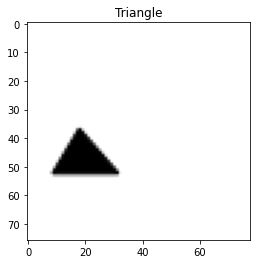

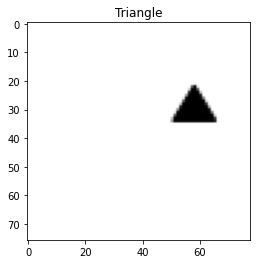

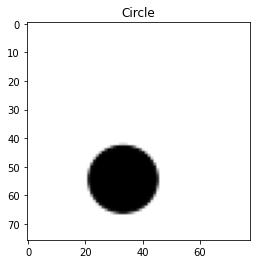

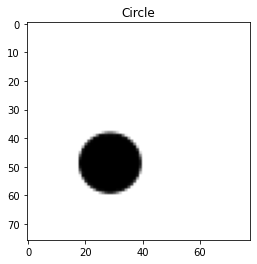

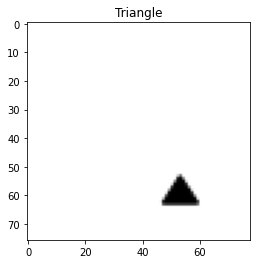

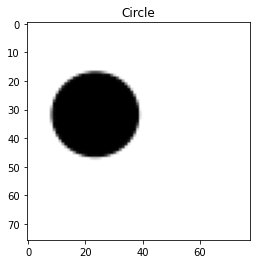

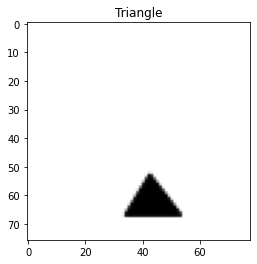

In [4]:
for iter_, (image, label) in enumerate(zip(X, y)):
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title('Triangle' if label == 1 else 'Circle')
    plt.show()
    
    if iter_ > 5:
        break

❓ **Cuantas clases categoricas vamos a predecir** ❓

In [5]:
np.unique(y, return_counts = True)

(array([0, 1]), array([100, 100]))

## (1) Kernels

La siguietne funcion `compute_convolution` realiza una **opracion convolucional** esto aplica un kernel a la imagen.

❓ **Preguntas sobre la funcion `compute_convolution`** ❓

Ejecute la siguiente e intente comprender los diferentes pasos de la funcion.

In [6]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height + 1):
        arr = []
        
        for y in range(img_width - kernel_width + 1):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ **Como la funcion  `compute_convolution`  funciona en la practica** ❓ 


* Elija cualquier imagen del dataset
* Apliquen le siguiente kernel en la imagen
* Visualice la imagen de entrada y la imagen de salida. 
* ve alguna diferencia?

In [8]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

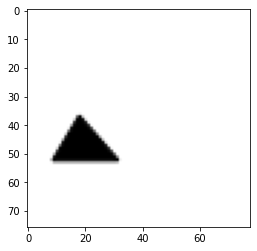

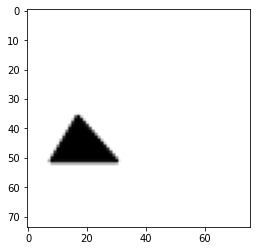

In [9]:
output = compute_convolution(X[0], identity_kernel)

plt.imshow(np.squeeze(X[0]), cmap='gray')
plt.show()

plt.imshow(output, cmap='gray')
plt.show()

- El kernel anteriormente utilizado es el kernel identidad, eso quiere decir que la salida sera igual que la entrada


🎁 Creamos una funcion `plot_convolution` la cual retorna una imagen afectanda por la imagen de entrada y el kernel .

 `plot_convolution` con el `kernel_1` 

Apliquelo al triangulo y al circulo.

In [10]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [11]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

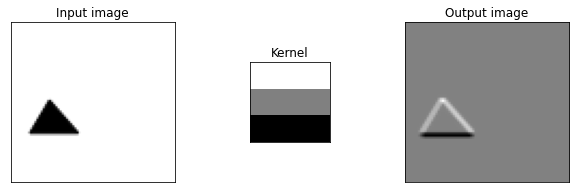

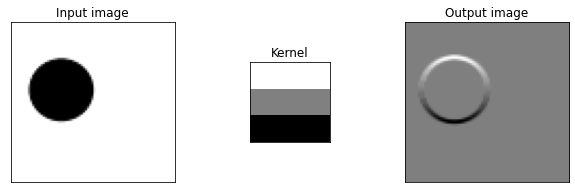

In [12]:
plot_convolution(X[0], kernel_1)
plot_convolution(X[5], kernel_1)

- Analicemos lo sucedido mas arriba
- Los pixeles blancos corresponden a valores altos y los pixeles negros a los mas bajos
- Por ejemplo si la funcion de activacion es 'relu', sabemos de antemano que los valores negativos seran seteados a cero

- Ahora corramos la misma funcion pero poniendo la activacion igual True

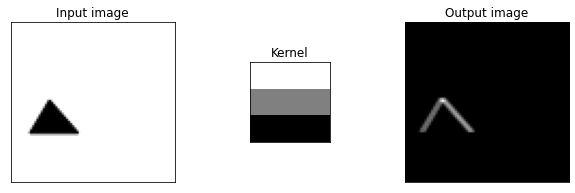

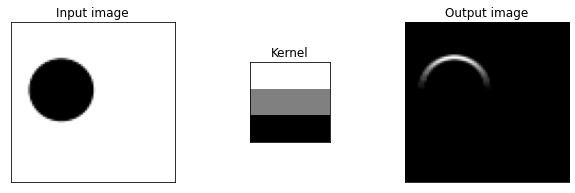

In [13]:
plot_convolution(X[0], kernel_1, activation=True)
plot_convolution(X[5], kernel_1, activation=True)

Este kernel esta resaltando los bordes en la direccion dada

❓ **Juguemos con diferentes kernels...** ❓

Los siguientes kernels, generaran diferentes efectos.

In [14]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

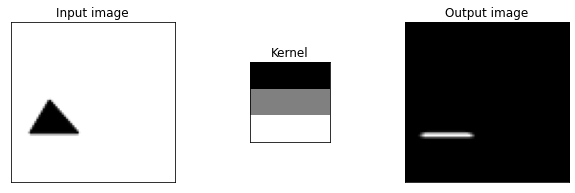

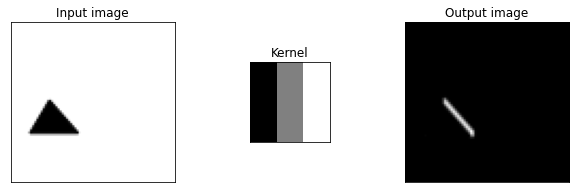

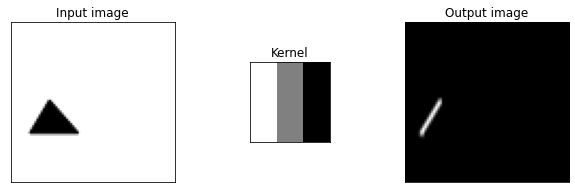

In [15]:
plot_convolution(X[0], kernel_2, activation=True)
plot_convolution(X[0], kernel_3, activation=True)
plot_convolution(X[0], kernel_4, activation=True)

❓ **Que fecto tendra el tamaño del kernel** ❓

Intentemos con _kernel_big_.

In [16]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])

kernel_big

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

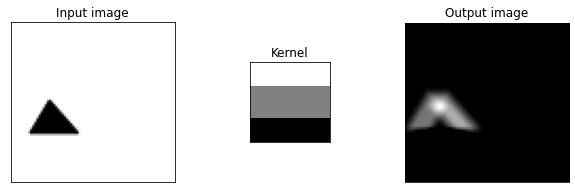

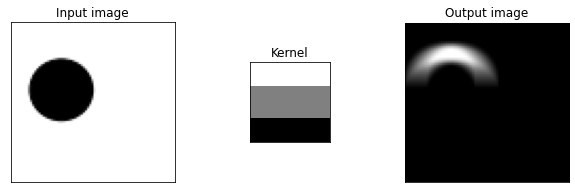

In [17]:
plot_convolution(X[0], kernel_big, activation=True)
plot_convolution(X[5], kernel_big, activation=True)

❓ **Intentemos con otro kernel**  ❓

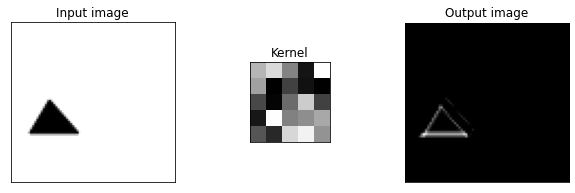

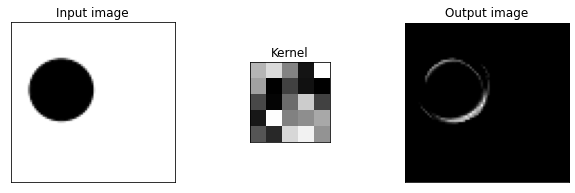

In [19]:
random_kernel = np.random.uniform(-10, 10, (5, 5))

plot_convolution(X[0], random_kernel, activation=True)
plot_convolution(X[5], random_kernel, activation=True)


- Ahora que entiendes lo que hace una operacion de convolucion a una imagen, provemos con un caso real

## (2) Convolutional Neural Network

### (2.1) Arquitectura y entrenamiento

❓ **Diseñemos una CNN** ❓

escribamos la siguiente CNN como: 
- a Convolutional Layer con 16 filters con $ (4, 4) $ kernels.
- a Convolutional Layer con 32 filters con $ (3, 3) $ kernels.
- a Convolutional Layer con 64 filters con $ (3, 3) $ kernels.
- a Convolutional Layer con 64 filters con $ (2, 2) $ kernels.

con:
- A Max-Pooling Layer (con un $ (2, 2) $ pool-size) despues de cada convolucion.
- Un Hidden Dense Layer con un tamaño a eleccion, sea resonable:
    - despues l aparte flattening  
    - pero antes del ultimo layer

Tambien, asegurese de compilar su modelo con los parametros apropiados

In [21]:
from tensorflow.keras import layers, models

def initialize_model():
    
    
    model = models.Sequential()

    model.add(layers.Conv2D(16, (4, 4), input_shape = (76, 78, 1), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(64, (2, 2), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(units = 10, activation = 'relu'))
    model.add(layers.Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics =['accuracy'])
    
       
    
    return model

In [23]:
model = initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)        

In [24]:
# Parametros en el primer Conv2D
( (4*4) * 1 + 1) * 16

272

In [25]:
# Parametros en el segundo Conv2D
( (3*3) * 16 + 1) * 32

4640

In [26]:
# Parametros en el tercer Conv2D
( (3*3) * 32 + 1) * 64

18496

In [27]:
# Parametros en la cuarta y ultima Conv2D
( (2*2) * 64 + 1) * 64

16448

* Fitear el modelo. Deberia haber alcanzado un accuracy al menos de 90%. 

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

model = initialize_model()

history = model.fit(X, y,
                    validation_split = 0.3,
                    batch_size = 16,
                    epochs=50,
                    callbacks=[es],
                    verbose = 1)

Epoch 1/50
9/9 [==============================] - 1s 37ms/step - loss: 0.6872 - accuracy: 0.5214 - val_loss: 0.6657 - val_accuracy: 0.8667
Epoch 2/50
9/9 [==============================] - 0s 21ms/step - loss: 0.6436 - accuracy: 0.7429 - val_loss: 0.6030 - val_accuracy: 0.7167
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.5283 - accuracy: 0.7643 - val_loss: 0.5412 - val_accuracy: 0.6667
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3796 - accuracy: 0.8857 - val_loss: 0.3857 - val_accuracy: 0.8167
Epoch 5/50
9/9 [==============================] - 0s 22ms/step - loss: 0.2842 - accuracy: 0.8929 - val_loss: 0.2752 - val_accuracy: 0.8667
Epoch 6/50
9/9 [==============================] - 0s 25ms/step - loss: 0.1653 - accuracy: 0.9571 - val_loss: 0.1710 - val_accuracy: 0.9667
Epoch 7/50
9/9 [==============================] - 0s 25ms/step - loss: 0.1324 - accuracy: 0.9357 - val_loss: 0.1327 - val_accuracy: 0.9333
Epoch 8/50
9/9 [===========

🎁 Codeamos un `plot_loss_accuracy` para vos.

❓ **El modelo CNN converge** ❓

_Ves algun indicio de sobreajuste (overfitting)?_

In [30]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

Parece ser que no estamos sobreajustando el modelo ;)


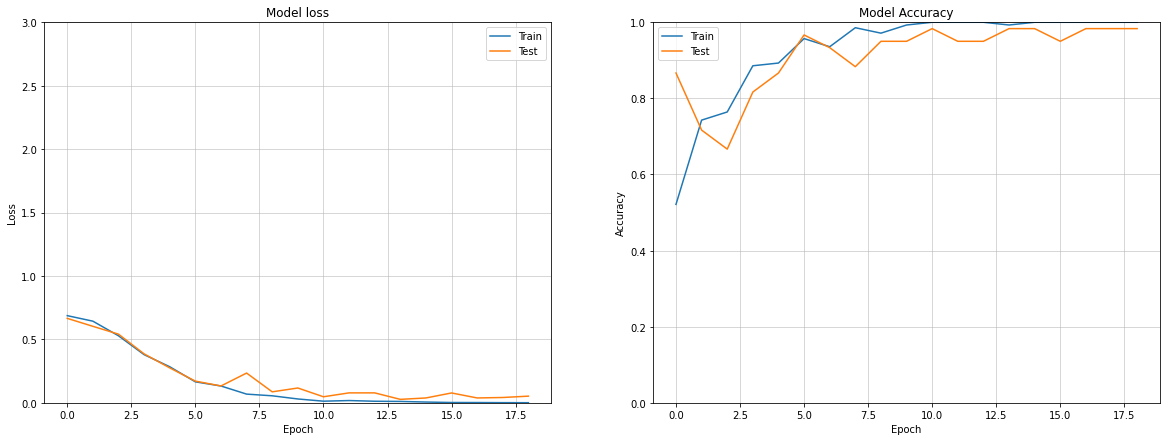

In [31]:
plot_loss_accuracy(history)

print("Parece ser que no estamos sobreajustando el modelo ;)")

### (2.2) Entendimiento profundo de  CNN

🕵️‍♀️ Con la siguiente tabla, tendras una observacion de los diferentes pesos, kernels y filtros involucrados en el CNN que construiste anteriormente:

| layer_number | convolution_layer | kernel_number | channel_number |
|--------------|-------------------|---------------|----------------|
| 0            | conv2D no 1       | 16            | 1              |
| 2            | conv2D no 2       | 32            | 16             |
| 4            | conv2D no 3       | 64            | 32             |
| 8            | conv2D no 4       | 64            | 64             |

#### (2.2.1) Kernels

👩🏻‍🏫 Para cualquier red neuronal sequencial (Dense or Convolutional), debes:
- imprimir el **`.summary()`** para visualizar capas y el numero de pesos/parametros involucrados
- acceder a diferentes **`.layers`** de tu modelo
- acceder a los diferentes parametros **`.weights`** de la capa

❓ **Enlista las dierentes capas de tu modelos CNN** ❓

In [32]:
model.layers

❓ **intente acceder a la matriz de peso `w` de tu primer capa convolucional, luego a la segunda** ❓  
pista: los parametros de capas consisten de la matriz de peso y los ajustes (w, b)

In [33]:
model.layers[0].weights[0].shape

TensorShape([4, 4, 1, 16])

In [34]:
model.layers[2].weights[0].numpy().shape

(3, 3, 16, 32)

👉 `[4, 4, 1, 16]` representa
- los pesos de los filtros de un tamaño `4` * `4`
- y plicamos el canal de numero `1`(single B&W input)
- y decidimos aplicar `16` tipos diferentes de kernels en esta capa



❓ **Visualicemos la primer capa** ❓ 

La imagen original posee 1 canal.. y nosotros creamos 16 salidas usando 16 kernels!

🪄 Usando `plot_convolution(activation = True)`, visualice algunos kernels de la primer capa convolucional, junto con la activacion de salida, para ver que aprendio el modelo de las imagenes en esta capa.

------------------------- Efecto de los diferentes numeros de kernel = 0 -------------------------


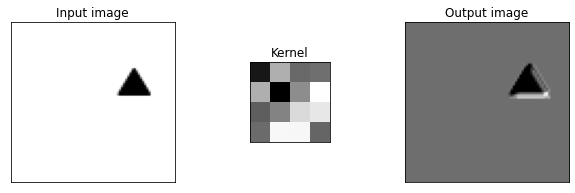

------------------------- Efecto de los diferentes numeros de kernel = 1 -------------------------


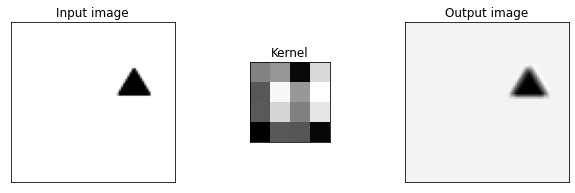

------------------------- Efecto de los diferentes numeros de kernel = 2 -------------------------


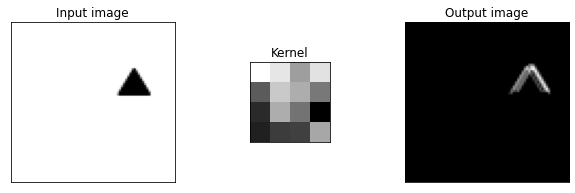

------------------------- Efecto de los diferentes numeros de kernel = 3 -------------------------


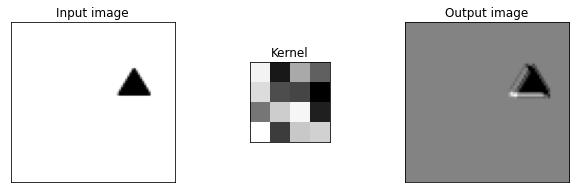

------------------------- Efecto de los diferentes numeros de kernel = 4 -------------------------


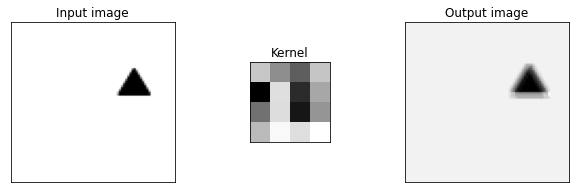

------------------------- Efecto de los diferentes numeros de kernel = 5 -------------------------


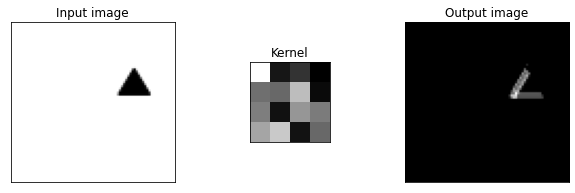

------------------------- Efecto de los diferentes numeros de kernel = 6 -------------------------


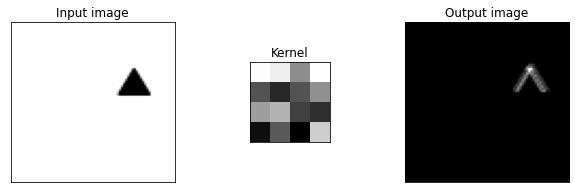

------------------------- Efecto de los diferentes numeros de kernel = 7 -------------------------


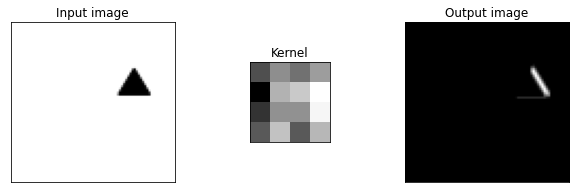

------------------------- Efecto de los diferentes numeros de kernel = 8 -------------------------


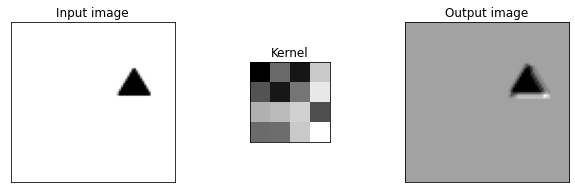

------------------------- Efecto de los diferentes numeros de kernel = 9 -------------------------


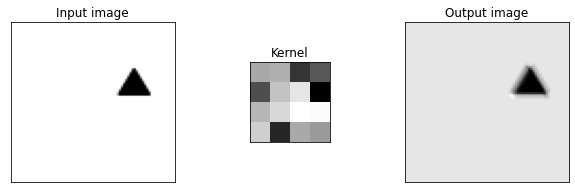

------------------------- Efecto de los diferentes numeros de kernel = 10 -------------------------


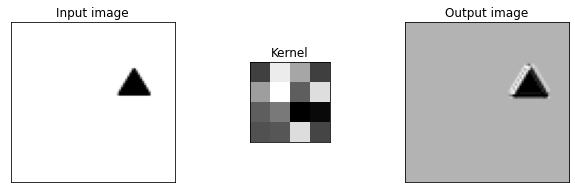

------------------------- Efecto de los diferentes numeros de kernel = 11 -------------------------


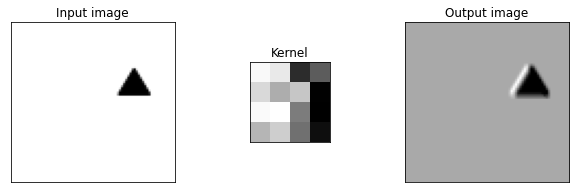

------------------------- Efecto de los diferentes numeros de kernel = 12 -------------------------


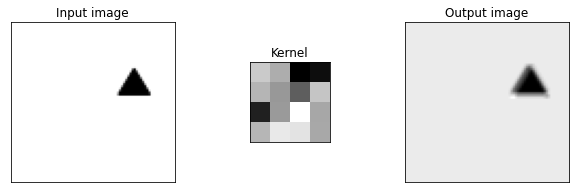

------------------------- Efecto de los diferentes numeros de kernel = 13 -------------------------


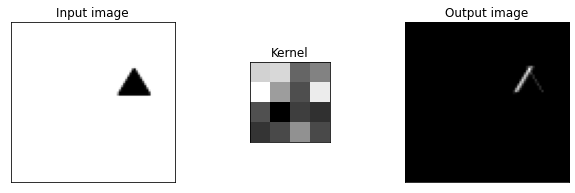

------------------------- Efecto de los diferentes numeros de kernel = 14 -------------------------


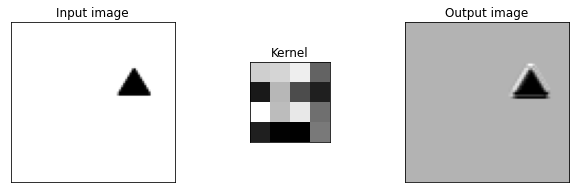

------------------------- Efecto de los diferentes numeros de kernel = 15 -------------------------


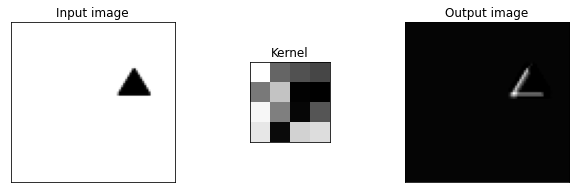

In [35]:
layer_number = 0
channel_number = 0
for k in np.arange(0, 16):
    print(f"------------------------- Efecto de los diferentes numeros de kernel = {k} -------------------------")
    kernel = model.layers[layer_number].weights[0].numpy()[:, :, channel_number, k]
    plot_convolution(X[1], kernel, activation=True)

#### (2.2.2) Activaciones

- Nosotros fisualizamos la imagen de salida (output image) de la primer capa convolucional
- Que tal si queremos visualizar la imagen despues de la tercera o cuarta capa?
- bueno, necesitaremos computar la ctivacion del primer layer
- luego alimentar la segunda coputacion de activacion de la primer activacion
- Luego alimentarlo a la tercera
- etc

- Utilizaremos la sintaxis de `tensorflow.keras` `Fonctional API`

<u><i>Paso 1: enlistar las  11 capas de salida de tu CNN</i></u>

In [36]:
layers_outputs = [layer.output for layer in model.layers]
layers_outputs

[<KerasTensor: shape=(None, 73, 75, 16) dtype=float32 (created by layer 'conv2d_8')>,
 <KerasTensor: shape=(None, 36, 37, 16) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 34, 35, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 17, 17, 32) dtype=float32 (created by layer 'max_pooling2d_9')>,
 <KerasTensor: shape=(None, 15, 15, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_10')>,
 <KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'max_pooling2d_11')>,
 <KerasTensor: shape=(None, 576) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>]

<u><i>Paso 2: instanciar 11 sub-modelos re-utilizando pesos ('w') y ajustes ('b') entrenados</i></u> 
- layer1
- layer1 $ \Rightarrow $ layer2
- layer1 $ \Rightarrow $ layer2 $ \Rightarrow $ layer3

In [37]:
from tensorflow.keras import Model

In [38]:
activation_models = [Model(inputs=model.input, outputs=output) for output in layers_outputs]

<u><i>paso 3: ingresar los outputs de cada submodelo</i></u>

In [39]:
activations = [m.predict(X) for m in activation_models]
len(activations)

11

👇 Pro tips  En tensorflow, puedes crear un solo modelos para muchos outputs para evitar los loops de python 

In [40]:
layers_outputs = [layer.output for layer in model.layers] 
activation_model = Model(inputs=model.input, outputs=layers_outputs) 
activations = activation_model.predict(X) 

❓ **Ahora ingresamos las activaciones, elegimos una imagen y visualizamos la activacion de las "imagenes" para cada capa convolucional** ❓ 


--- Observando los efectos de la capa convolucional numero 0... ---

16 los kernels que apliquemos aqui son las activaciones de esta Conv2d Layer:


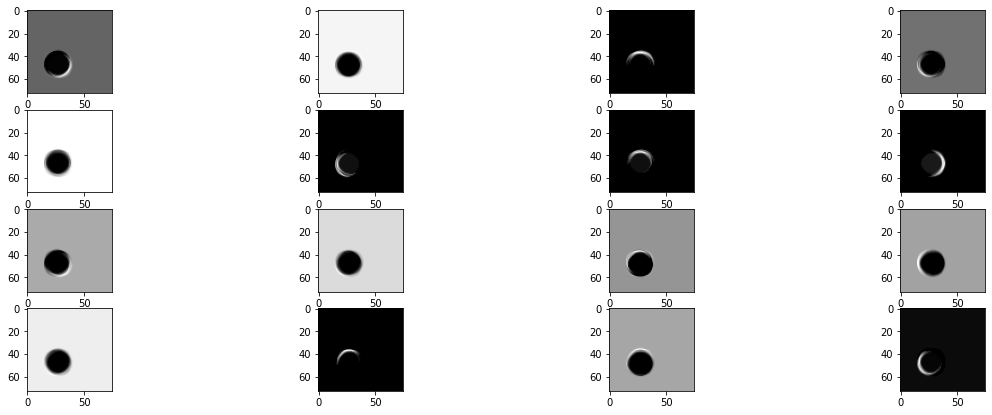

--- Observando los efectos de la capa convolucional numero 2... ---

32 los kernels que apliquemos aqui son las activaciones de esta Conv2d Layer:


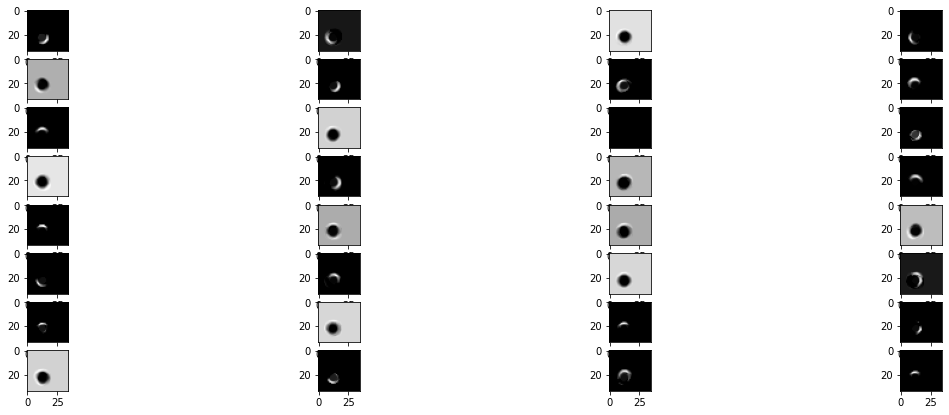

--- Observando los efectos de la capa convolucional numero 4... ---

64 los kernels que apliquemos aqui son las activaciones de esta Conv2d Layer:


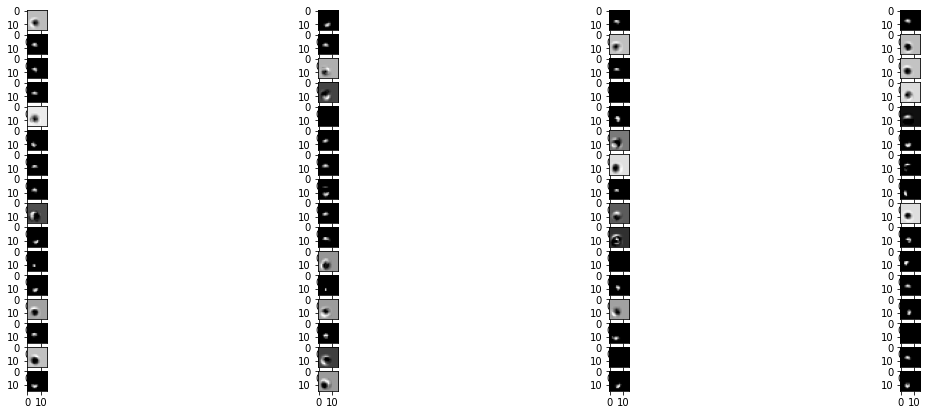

--- Observando los efectos de la capa convolucional numero 6... ---

64 los kernels que apliquemos aqui son las activaciones de esta Conv2d Layer:


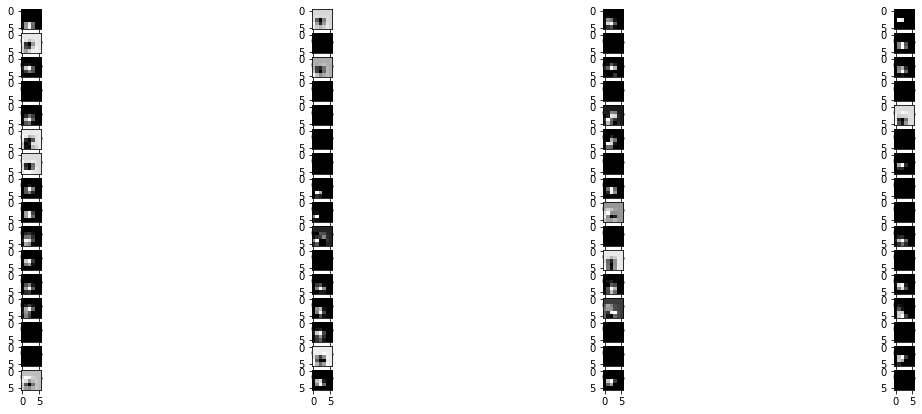

In [42]:
image_number = 3   # tenemos 100 trieangulos y 100 circulos

for layer_number in [0,2,4,6]:
    
    print(f"--- Observando los efectos de la capa convolucional numero {layer_number}... ---")
    print("")
    
    temp_number_kernels = model.layers[layer_number].weights[0].shape[-1]
    print(f"{temp_number_kernels} los kernels que apliquemos aqui son las activaciones de esta Conv2d Layer:")
    
    fig, axes = plt.subplots(int(temp_number_kernels/4),4, figsize=(20,7))
    
    
    for ax, kernel_number in zip(axes.flat,range(temp_number_kernels)):
        activation = activations[layer_number][image_number][:, :, kernel_number]
        ax.imshow(activation, cmap="gray")
    
    plt.show()

- Notas

- Notece que la informacion de la imagen fluye a traves de la red neuronal convolucional
- Deberias ver que la imagen se vuelve cada vez mas abstracta